# Tarea Clase 3 - APIs + Pandas

Armado de un dataframe con información de países y datos climáticos, y análisis de los datos.

Haciendo uso de las APIs:

* paises: f"https://restcountries.com/v3.1/name/{pais}"
* climatica: "https://api.open-meteo.com/v1/forecast"

armar un dataframe con al menos 20 paises, que contenga las siguientes columnas:
 * 1. Nombre del pais
 * 2. Moneda
 * 3. Nombre de moneda
 * 4. Continente al que pertenece
 * 5. Capital
 * 6. Temperatura
 * 7. Velocidad del viento.

 Teniendo el dataframe completo, realizar:
 * filtrados sobre filas (los que se les ocurra)
 * por continente, la temperatura promedio. Tiene sentido para la época anual?
 * todos los gráficos que puedan construir y explicarlos.

Guardar dataframe obtenido en los formatos vistos en clase.


## Armado del dataframe con la información requerida

1) Armamos una lista de países a consultar

In [83]:
# Lista de países en Inglés
countries = ['Argentina', 'Colombia', 'Brazil', 'Peru', 'Chile', 'Ecuador', 'Bolivia', 'Paraguay', 'Uruguay', 'Venezuela', 'France','Germany','Italy','Spain','Portugal','Netherlands','Belgium','Switzerland','Austria','Greece']
len(countries)

20

2) Hacemos requests a las APIs de países y clima para obtener la información que necesitamos

In [ ]:
import requests

# Listas para almacenar los datos
list_countries = []
list_currencies = []
list_currencies_name = []
list_regions = []
list_capitals = []
list_latitudes = []
list_longitudes = []
list_temperatures = []
list_windspeeds = []

# Recorrer la lista de países y obtenemos los datos
for country in countries:
    url = f'https://restcountries.com/v3.1/name/{country}'
    url2 = 'https://api.open-meteo.com/v1/forecast'

    response = requests.get(url)
    data = response.json()

    try:
            # usamos la API de restcountries para obtener datos del país
        country_name = data[0]['name']['common']
        country_currency = data[0]['currencies'][list(data[0]['currencies'].keys())[0]]['symbol']
        country_currency_name = data[0]['currencies'][list(data[0]['currencies'].keys())[0]]['name']
        country_region = data[0]['region']
        country_capital = data[0]['capital'][0]
        country_latitude = data[0]['latlng'][0]
        country_longitude = data[0]['latlng'][1]

        list_countries.append(country_name)
        list_currencies.append(country_currency)
        list_currencies_name.append(country_currency_name)
        list_regions.append(country_region)
        list_capitals.append(country_capital)
        list_latitudes.append(country_latitude)
        list_longitudes.append(country_longitude)
    except KeyError as err:
        print(f'Error for country {country}: {err}')

    # Obtener datos climáticos de la API de open-meteo
    params = {
        'latitude': country_latitude,
        'longitude': country_longitude,
        'current': 'temperature_2m,windspeed_10m',
        'timezone': 'UTC'
    }
    res = requests.get(url2, params=params, timeout=10)
    data_weather = res.json()

    try:
        list_temperatures.append(data_weather['current']['temperature_2m'])
        list_windspeeds.append(data_weather['current']['windspeed_10m'])
    except KeyError as err:
        print(f'Data weather error for country {country}: {err}')

3) Con las listas creamos el diccionario y luego el dataframe

In [85]:
dict_country = {
    'name': list_countries,
    'currency': list_currencies,
    'currency_name': list_currencies_name,
    'region': list_regions,
    'capital': list_capitals,
    'temperatures': list_temperatures,
    'windspeeds': list_windspeeds
}

In [86]:
import pandas as pd
df_countries = pd.DataFrame(dict_country)


In [87]:
df_countries

,name,currency,currency_name,region,capital,temperatures,windspeeds
0,Argentina,$,Argentine peso,Americas,Buenos Aires,25.2,16.0
1,Colombia,$,Colombian peso,Americas,Bogotá,31.1,20.6
2,Brazil,R$,Brazilian real,Americas,Brasília,30.5,5.2
3,Peru,S/,Peruvian sol,Americas,Lima,12.3,11.5
4,Chile,$,Chilean peso,Americas,Santiago,25.4,15.1
5,Ecuador,$,United States dollar,Americas,Quito,30.2,13.8
6,Bolivia,Bs.,Bolivian boliviano,Americas,Sucre,15.2,6.6
7,Paraguay,₲,Paraguayan guaraní,Americas,Asunción,34.5,4.9
8,Uruguay,$,Uruguayan peso,Americas,Montevideo,37.5,10.5
9,Venezuela,Bs.S.,Venezuelan bolívar soberano,Americas,Caracas,33.5,27.9


## Filtrado de datos

- Filtramos aquellos países con temperatura mayor a 25º

In [88]:
# Aquellos países con temperaturas mayores a 25º

df_countries.loc[df_countries['temperatures']>25]

,name,currency,currency_name,region,capital,temperatures,windspeeds
0,Argentina,$,Argentine peso,Americas,Buenos Aires,25.2,16.0
1,Colombia,$,Colombian peso,Americas,Bogotá,31.1,20.6
2,Brazil,R$,Brazilian real,Americas,Brasília,30.5,5.2
4,Chile,$,Chilean peso,Americas,Santiago,25.4,15.1
5,Ecuador,$,United States dollar,Americas,Quito,30.2,13.8
7,Paraguay,₲,Paraguayan guaraní,Americas,Asunción,34.5,4.9
8,Uruguay,$,Uruguayan peso,Americas,Montevideo,37.5,10.5
9,Venezuela,Bs.S.,Venezuelan bolívar soberano,Americas,Caracas,33.5,27.9
15,Caribbean Netherlands,$,United States dollar,Americas,Kralendijk,26.2,33.7


- Nombre de los países cuyos vientos sean menores a 10 km/h. Mostrar los nombres y la velocidad del viento.

In [89]:
# Nombre de los países y velocidad de los vientos menores a 10

df_countries.loc[df_countries['windspeeds']<10][['name', 'windspeeds']]

,name,windspeeds
2,Brazil,5.2
6,Bolivia,6.6
7,Paraguay,4.9
12,Italy,1.5
13,Spain,6.5
17,Switzerland,5.4
18,Austria,1.3
19,Greece,5.0


- Mostrar los nombres de los países que sean de Europa y cuyos vientos sean menores a 10 km/h y las temperaturas sean menores a 5ºC

In [90]:
# Mostrar los nombres de los países de Europa cuyos vientos sean menores a 10 y las temperaturas menores a 5º

filtro1 = df_countries['windspeeds']<10
filtro2 = df_countries['region'] == 'Europe'
filtro3 = df_countries['temperatures']<5
filtro_final = filtro1*filtro2*filtro3
df_countries.loc[filtro_final]['name']

17    Switzerland
18        Austria
Name: name, dtype: str

- Mostrar los países cuyos vientos sean mayores a 20 km/h.

In [91]:
# Mostrar los países cuyos vientos sean mayores a 20
df_countries.loc[df_countries['windspeeds']>20][['name', 'windspeeds']]

,name,windspeeds
1,Colombia,20.6
9,Venezuela,27.9
11,Germany,23.1
15,Caribbean Netherlands,33.7
16,Belgium,20.2


- Mostrar los países cuyas teperaturas estén entre 10 y 20 ºC

In [92]:
# Mostrar los países cuya temperatura esté entre 10 y 20 grados
filtro_r1 = df_countries['temperatures']>=10
filtro_r2 = df_countries['temperatures']<=20
filtro_final_2 = filtro_r1 * filtro_r2
df_countries.loc[filtro_final_2][['name', 'temperatures']]

,name,temperatures
3,Peru,12.3
6,Bolivia,15.2
14,Portugal,12.5


- Mostrar los países cuya moneda contenga pesos

In [93]:
# Mostrar los países cuya moneda contenga pesos
filtro_pesos = df_countries['currency_name'].str.contains('peso')
paises_pesos = df_countries.loc[filtro_pesos][['name', 'currency_name']]
paises_pesos

,name,currency_name
0,Argentina,Argentine peso
1,Colombia,Colombian peso
4,Chile,Chilean peso
8,Uruguay,Uruguayan peso


- Mostrar los países cuya moneda sea el Euro

In [94]:
# Mostrar los países cuya moneda sea el Euro
filtro_euro = df_countries['currency_name'].str.contains('Euro')
paises_euros = df_countries.loc[filtro_euro][['name', 'currency_name']]
paises_euros

,name,currency_name
10,France,Euro
11,Germany,Euro
12,Italy,Euro
13,Spain,Euro
14,Portugal,Euro
16,Belgium,Euro
18,Austria,Euro
19,Greece,Euro


- Mostrar los países cuya moneda sea el dólar

In [95]:
# Mostrar los países cuya moneda sea el Dólar
filtro_dolar = df_countries['currency_name'].str.contains('dollar')
paises_dolares = df_countries.loc[filtro_dolar][['name', 'currency_name']]
paises_dolares

,name,currency_name
5,Ecuador,United States dollar
15,Caribbean Netherlands,United States dollar


- Mostrar los países cuya moneda sea distinto al dólar, peso y euro

In [96]:
# Mostrars los países cuya moneda no sea ni el Euro ni el Peso ni el dolar
filtro_otros_1 = df_countries['currency_name'].str.contains('Euro')==False
filtro_otros_2 = df_countries['currency_name'].str.contains('peso')==False
filtro_otros_3 = df_countries['currency_name'].str.contains('dollar')==False

filtro_otros_final = filtro_otros_1 * filtro_otros_2 * filtro_otros_3
paises_otros = df_countries.loc[filtro_otros_final][['name', 'currency_name']]
paises_otros

,name,currency_name
2,Brazil,Brazilian real
3,Peru,Peruvian sol
6,Bolivia,Bolivian boliviano
7,Paraguay,Paraguayan guaraní
9,Venezuela,Venezuelan bolívar soberano
17,Switzerland,Swiss franc


- Ranking de países con mayor viento

In [97]:
# Ranking de paises con más vientos
df_countries.sort_values(by='windspeeds', ascending=False)[['name', 'windspeeds']].head()

,name,windspeeds
15,Caribbean Netherlands,33.7
9,Venezuela,27.9
11,Germany,23.1
1,Colombia,20.6
16,Belgium,20.2


- Ranking de países con mayores temperaturas

In [98]:
# Ranking de países con mejores temperaturas
df_countries.sort_values(by='temperatures', ascending=False)[['name', 'temperatures']].head()

,name,temperatures
8,Uruguay,37.5
7,Paraguay,34.5
9,Venezuela,33.5
1,Colombia,31.1
2,Brazil,30.5


### Temperatura promedio por continente

In [99]:
# Temperaturas promedio por continente
df_countries.groupby('region')['temperatures'].mean()

region
Americas    27.418182
Europe       5.822222
Name: temperatures, dtype: float64

El promedio de temperaturas por continente tiene sentido pues en el conjunto de datos se encuentran países mayoritariamente de Sudamérica que influyen en un promedio alto de temperaturas para la región Americana ya que se encuentran en el verano.

Mientras que, en Europa, el promedio es bajo debido a que están en el invierno. 

Conclusión: los promedios de las temperaturas por continente tienen sentido debido a la ubicación geográfica y la estación del año en la que se encuentran los países del conjunto de datos.


## Gráficos

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

### Distribución de los datos de temperatura y velocidad del viento por continente

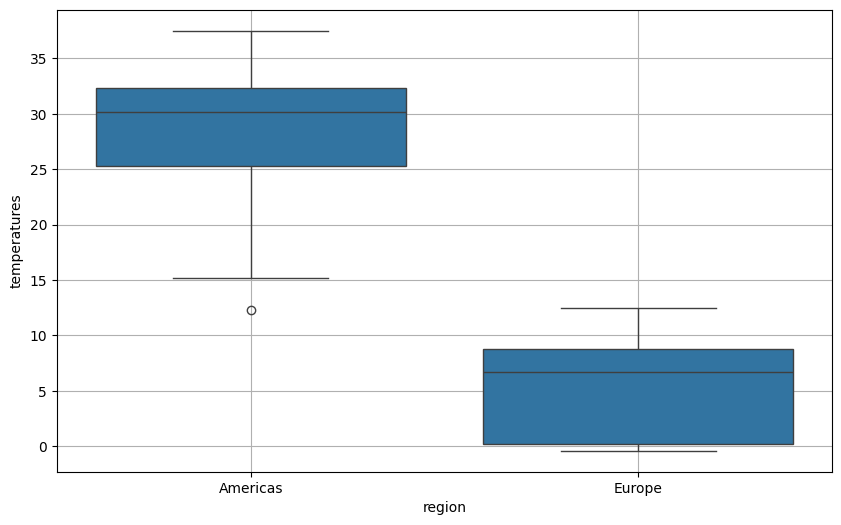

In [101]:
# Gráfico de boxplot de temperaturas por continente
plt.figure(figsize=(10,6))
sns.boxplot(data=df_countries, x='region', y='temperatures')
plt.grid()
plt.show()

In [102]:
df_countries.groupby('region')['windspeeds'].median()

region
Americas    13.8
Europe       6.5
Name: windspeeds, dtype: float64

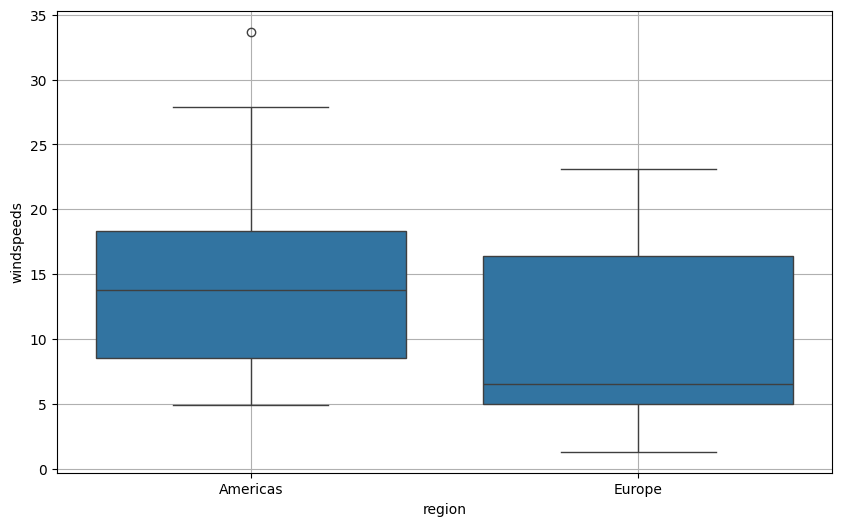

In [103]:
# Box plot de velocidades de viento por continente
plt.figure(figsize=(10,6))
sns.boxplot(data=df_countries, x='region', y='windspeeds')
plt.grid()
plt.show()

### Temperatura por país

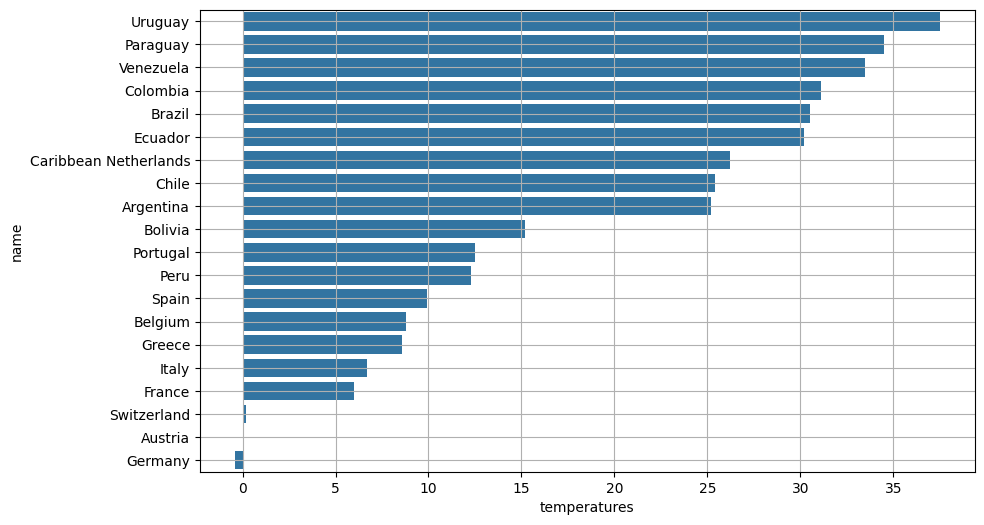

In [104]:
# Gráfico de barras de temperaturas por país
orden = df_countries.sort_values('temperatures', ascending=False)['name']

plt.figure(figsize=(10,6))
sns.barplot(data=df_countries, x='temperatures', y='name', order=orden)
plt.grid()
plt.show()

### Vientos por país

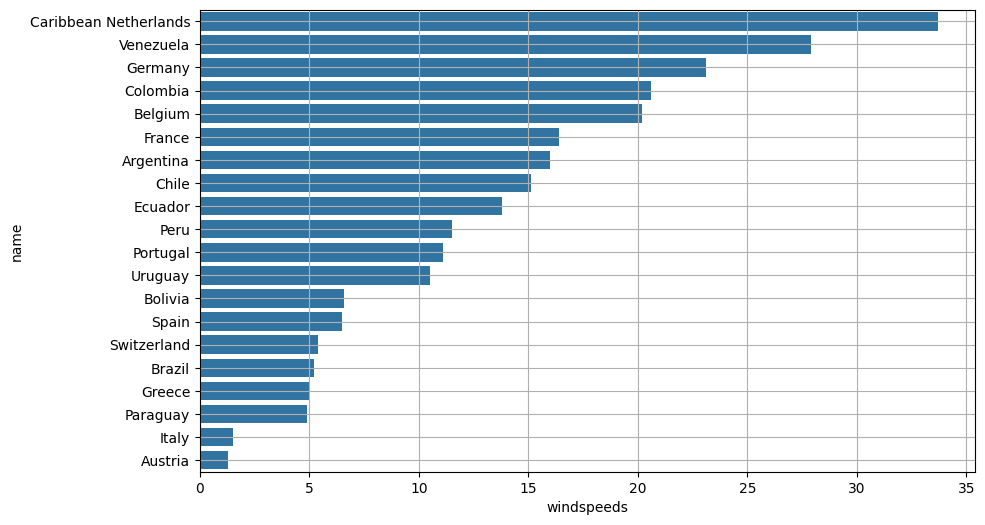

In [105]:
# Grafico de vientos por paises
orden_wind = df_countries.sort_values('windspeeds', ascending=False)['name']
plt.figure(figsize=(10,6))
sns.barplot(data=df_countries, x='windspeeds', y='name', order=orden_wind)
plt.grid()
plt.show()

### Cantidad de países por continente

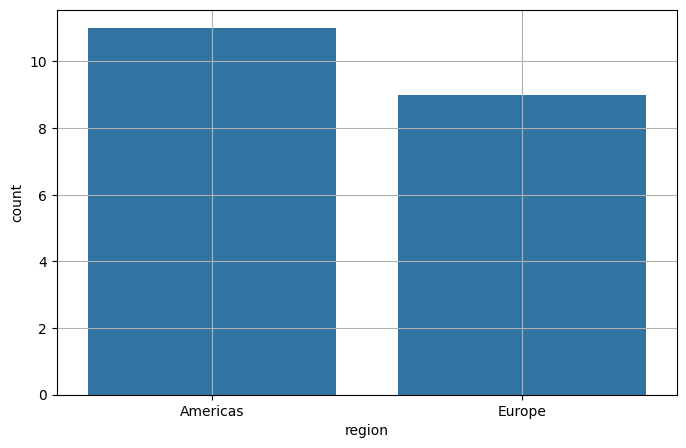

In [106]:
# Grafico de la cantidad de paises por continente
plt.figure(figsize=(8,5))
sns.countplot(data=df_countries, x='region')
plt.grid()
plt.show()

### Temperaturas promedio por continente

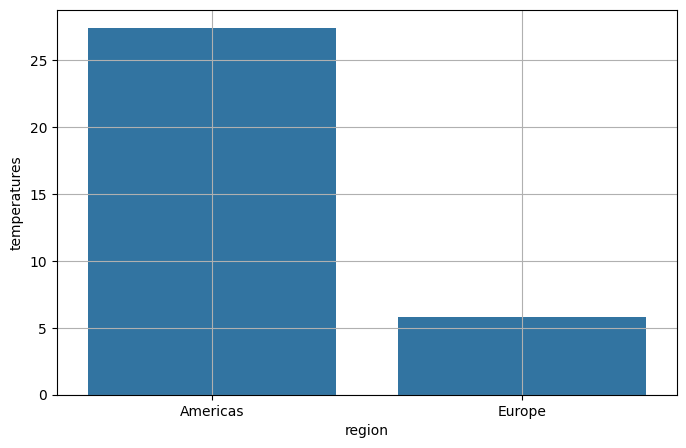

In [107]:
# Gráfico de barras de temperaturas promedio por continente
avg_temps = df_countries.groupby('region')['temperatures'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=avg_temps, x='region', y='temperatures')
plt.grid()
plt.show()


### Vientos promedio por continente

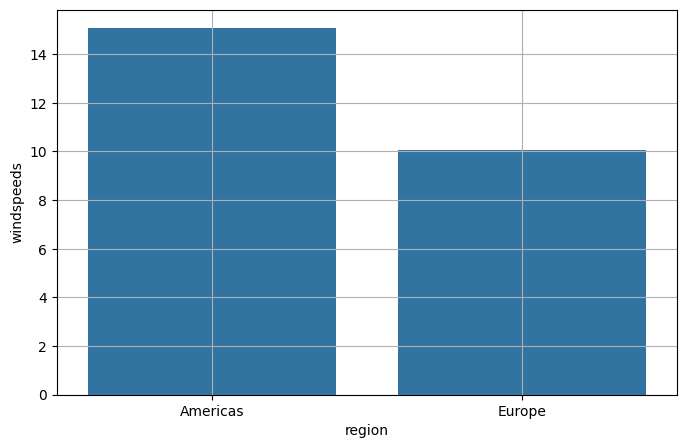

In [108]:
# Gráfico de barras de vientos promedio por continente
avg_winds = df_countries.groupby('region')['windspeeds'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=avg_winds, x='region', y='windspeeds')
plt.grid()
plt.show()

### Cantidad de países por moneda

In [109]:
def map_currency(name):
    if pd.isna(name):
        return 'Otros'
    currency = name.lower()
    if 'peso' in currency:
        return 'Pesos'
    elif 'dollar' in currency or 'united states dollar' in currency:
        return 'Dólares'
    elif 'euro' in currency:
        return 'Euros'
    else:
        return 'Otros'

df_countries['currency_group'] = df_countries['currency_name'].apply(map_currency)

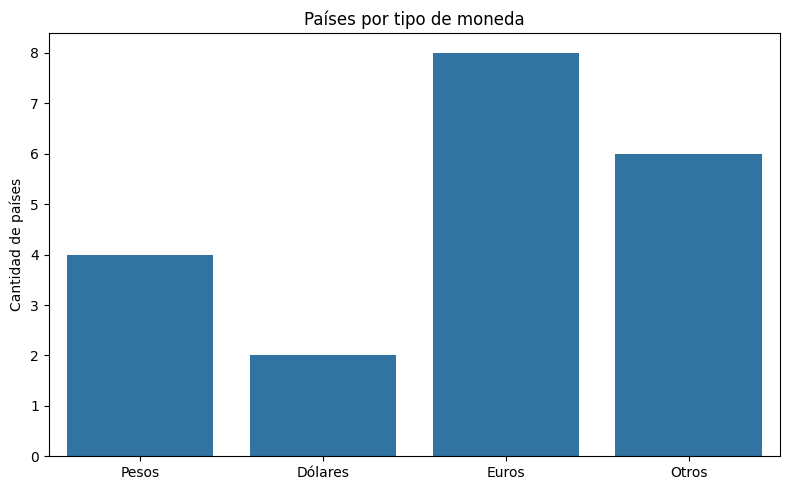

In [ ]:
# Gráfico de barras de cantidad de paises agrupados por moneda (peso, dolar, euro, otros) 
order = ['Pesos', 'Dólares', 'Euros', 'Otros'] 
plt.figure(figsize=(8,5))
sns.countplot(x='currency_group', data=df_countries, order=order)
plt.xlabel('')
plt.ylabel('Cantidad de países')
plt.title('Países por tipo de moneda')
plt.tight_layout()
plt.show()